# Interactive scatter plot of CACO2 endpoint data 

In [1]:
#Carregam llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#per renderitzar plots
%matplotlib inline 

from rdkit.Chem import PandasTools, Draw, AllChem

Per llegir SDF usam PandasTools així:

In [2]:
mols = PandasTools.LoadSDF('caco2_mols.sdf')

Per llegir un CSV amb Pandas:
```python
data_from_csv = pd.read_csv('file.csv')

```

si vols afegir una columna a un Dataframe:

```python
mols['columna_nova'] = 1

```

,HCPSA,ID,ROMol,activity,fROTB,logD,name,rgyr
0,125.96,furosemide,,-6.5,0.212121,-1.21,furosemide,3.77187
1,75.04,guanabenz,,-4.5,0.181818,1.67,guanabenz,3.00601

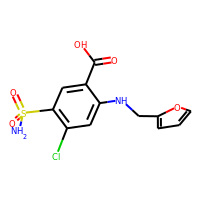
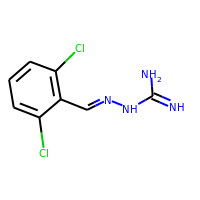

In [3]:
mols.head(2)

# Plots

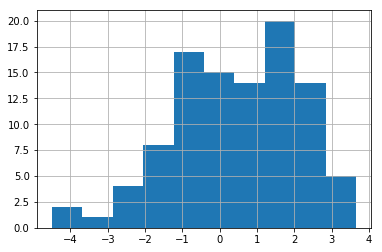

In [4]:
mols.logD.astype(float).hist(bins=10)

## Interactive plot with bokeh

In [87]:
#Així rulam un altre notebook amb funsions per mantenir aquest més clar
%run 'functions.ipynb'

Loading BokehJS ...

In [97]:
# Returns a modified dataframe with a new column 
# containing the path to the structure images
mols = get_structures(mols, imgformat='svg')

,HCPSA,ID,ROMol,activity,fROTB,logD,name,rgyr,img_path,morgan
0,125.96,furosemide,,-6.5,0.212121,-1.21,furosemide,3.77187,static/imgs/furosemide.svg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"

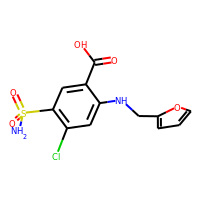

In [98]:
mols.head(1)

In [99]:
#add the morgan fingerprints
mols['morgan'] = mols.ROMol.apply(lambda x: 
                                  np.array(
                                      AllChem.GetMorganFingerprintAsBitVect(x,radius = 2, nBits=1024),dtype=int))

#create a df with the unlisted morgans
morgans = mols.morgan.apply(pd.Series)

In [100]:
morgans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Reduce dimensions with t-SNE wich is method that keeps the local structure of the high-D space in the low-D map

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(2)

morgans_projct = pca.fit_transform(morgans)

morgans_projct = pd.DataFrame(morgans_projct, columns=['x','y'])
mols_pr = mols.copy()
mols_pr['x'], mols_pr['y']= morgans_projct.x, morgans_projct.y
mols_pr = mols_pr.drop('morgan', axis=1) #drop morgans! we don't need them anymore
mols_pr = mols_pr.drop('ROMol', axis = 1) #drop for the plot 

In [103]:
mols_pr.HCPSA = mols_pr.HCPSA.astype(float)
mols_pr.activity = mols_pr.activity.astype(float)
mols_pr['activity_color'] = [ #creates a color map for a given column 
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.viridis(mpl.colors.Normalize()(mols_pr.activity))
    ]


In [104]:
interactiveplot(mols_pr)